In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [ ]:
transform = transforms.ToTensor()

batch_size = 4
learning_rate = 0.001

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('T-shirt/top', 'Trouser/pants','Pullover shirt','Dress','Coat','Sandal',
           'Shirt','Sneaker','Bag','Ankle boot')

100%|██████████| 26421880/26421880 [00:02<00:00, 12322978.62it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 193725.24it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3591582.60it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21378492.07it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
train_iter = iter(trainset)

image, label = next(train_iter)

image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
torch.min(image).item(), torch.max(image).item()

(0.0, 1.0)

**What it did:**
This code retrieves the minimum and maximum pixel values in the image tensor, which represents a FashionMNIST image. Let's break it down:

**torch.min(image):**

This computes the minimum value within the image tensor.
In a tensor representing an image, each element represents the intensity of a pixel. Since FashionMNIST images are grayscale, the pixel values will be between 0 and 1 if normalized, or between 0 and 255 if not normalized.

**torch.max(image):**

Similarly, this computes the maximum value within the image tensor, showing the pixel with the highest intensity.

**.item():**

Both torch.min(image) and torch.max(image) return tensor objects.
The .item() method converts these tensor values into Python scalar values (regular numbers), which makes them easier to print and work with.


Ankle boot


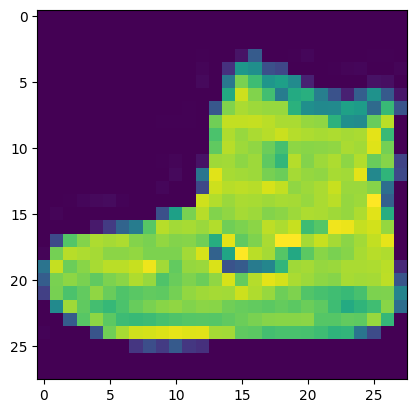

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np_img = image.numpy()
print(classes[label])
plt.imshow(np_img.reshape((28, 28, 1))) #In pytorch the challel dimension is first (1,28,28), but for matplotlib the channel dimension should be last for RGB, but shouldnt exist at all for grayscale images (28,28)

**matplotlib.pyplot**
Used for plotting and visualizing data.

**numpy**: A powerful library for handling arrays and matrices.

`image.numpy()`

This converts the PyTorch tensor image into a NumPy array. PyTorch stores images as tensors, but for visualization with matplotlib, you'll need to convert it to a NumPy array.

If image is a PyTorch tensor of shape (1, 28, 28) (grayscale image with one channel), this will convert it to a NumPy array with the same shape.

> *NOTE* If image is on the GPU, you must move it to the CPU before converting to NumPy

```
np_img = image.cpu().numpy()
```





In [ ]:
trainset, valset = torch.utils.data.random_split(trainset, [50000, 10000])

In [ ]:
len(trainset), len(valset), len(testset)

(50000, 10000, 10000)

In [ ]:
print(f'Number of batches in the training set: {int(50000 / batch_size)}')

Number of batches in the training set: 6250


In [ ]:
print(f'Number of batches in the validation set: {int(10000 / batch_size)}')

Number of batches in the validation set: 1250


In [ ]:
type(trainset)

torch.utils.data.dataset.Subset

**Setting up data loaders**

```
torch.utils.data.DataLoader
```
 A utility that allows you to **load data in batches and perform shuffling and parallel data loading using workers** (CPU threads).



In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Understanding 2D Convolution in CNNs

## 1. What is a 2D Convolution?
A **2D convolution** is a mathematical operation used primarily in image processing and convolutional neural networks (CNNs) to extract features from images. It involves a sliding window (filter or kernel) that moves across the input image to produce a feature map.

### How it Works:
- **Input Image**: An image is typically represented as a 2D array of pixel values. For a grayscale image, it has dimensions `(height, width)`, and for a color image (like RGB), it has dimensions `(height, width, channels)`.
- **Convolution Filter (Kernel)**: This is a smaller 2D array (e.g., `3x3` or `5x5`) of weights that is applied to the input image to detect features (like edges, textures, etc.).
- **Sliding**: The filter slides over the input image, performing an element-wise multiplication and summation at each position. This operation results in a new 2D array called a **feature map**.

## 2. In_channels and Out_channels
These terms are crucial when defining a convolutional layer.

### a. In_channels:
- **Definition**: This specifies the number of input channels in the image being processed.
- **Example**:
  - For a **grayscale image**, `in_channels` would be `1` (since there is one channel).
  - For an **RGB image**, `in_channels` would be `3` (representing the Red, Green, and Blue channels).

### b. Out_channels:
- **Definition**: This defines how many separate filters (or feature maps) the convolutional layer will learn. Each filter produces one output channel.
- **Example**:
  - If `out_channels` is set to `256`, then the convolutional layer will apply `256` different filters to the input. Each filter learns to detect different features, and the output will have `256` separate feature maps.

## 3. Conv Filters (Convolutional Filters)
- **Definition**: Filters (or kernels) are the small matrices (e.g., `3x3`, `5x5`) of weights that are learned during the training process.
- **Purpose**: Each filter is designed to detect specific features from the input image:
  - For instance, one filter might learn to detect horizontal edges, another might learn vertical edges, and others might detect more complex patterns.

### Example of a Filter:
```python
filter = [[0, -1, 0],
          [-1, 4, -1],
          [0, -1, 0]]
```
## 4. Max Pooling

### What is a Pooling Layer?
A **pooling layer** is used in convolutional neural networks (CNNs) to reduce the spatial dimensions (height and width) of the input feature maps. This is important for several reasons:
- **Dimensionality Reduction**: It decreases the number of parameters and computation in the network, making it more efficient.
- **Feature Extraction**: It helps retain the most important features while discarding less important information, contributing to better generalization.
- **Translation Invariance**: It makes the network more robust to small translations in the input image.

### Max Pooling Explained
**Max pooling** is one of the most common types of pooling. Here’s how it works:

1. **Window/Filter**:
   - A pooling layer uses a **window** (or filter) of a certain size, commonly `2x2` or `3x3`.
   - For max pooling, this window slides over the input feature map.

2. **Sliding the Window**:
   - The window moves across the feature map in strides (if `2`, it moves two pixels at a time).
   - At each position, it looks at the values contained within the window.

3. **Taking the Maximum Value**:
   - From the values covered by the window, max pooling selects the **maximum value**.
   - This value becomes part of the output feature map at that position.

### Example
Consider a simple example with a feature map of size `4x4`:




In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=256, kernel_size=3)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=2)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(in_features=4096, out_features=1024) # Since flattened size of last i.e conv3 is 1024×2×2=4096 (1024 features, pooling gives 2x2 output shape)
        self.drop1 = nn.Dropout(p=0.3)

        self.fc2 = nn.Linear(in_features=1024, out_features=1024)
        self.drop2 = nn.Dropout(p=0.3)

        self.out = nn.Linear(in_features=1024, out_features=10)


    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = self.pool1(x)

      x = F.relu(self.conv2(x))
      x = self.pool2(x)

      x = F.relu(self.conv3(x))
      x = self.pool3(x)

      x = self.flatten(x)

      x = F.relu(self.fc1(x))
      x = self.drop1(x)

      x = F.relu(self.fc2(x))
      x = self.drop2(x)

      x = self.out(x)

      return x

# Imports:


```
import torch.nn as nn
import torch.nn.functional as F
```
**torch.nn**: This module contains classes for building neural networks, including layers and activation functions.

**torch.nn.functional**: This module provides functions that can be applied to tensors, such as activation functions, pooling operations, etc., without creating a layer object.

# NeuralNet Class Definition:


```
class NeuralNet(nn.Module):
```
This class inherits from nn.Module, which is the **base class for all neural network modules** in PyTorch. By inheriting from this class, we can define a custom neural network architecture.

## init method
```
def __init__(self):
    super().__init__()
```
This calls the constructor of the parent class (nn.Module), **ensuring proper initialization of the base class.**

### Layers

```
self.conv1 = nn.Conv2d(in_channels=1, out_channels=256, kernel_size=3)
self.pool1 = nn.MaxPool2d(2, 2)
```
self.conv1:

* **nn.Conv2d**: This defines a 2D convolutional layer.

* **in_channels=1**: Input images are grayscale (1 channel).

* **out_channels=256**: This layer will output 256 feature maps.
* **kernel_size=3**: Each convolution filter is 3x3 pixels.
self.pool1:

* **nn.MaxPool2d(2, 2)**: This defines a max pooling layer.
The pooling layer reduces the spatial dimensions (height and width) of the feature maps by taking the maximum value over a 2x2 window, effectively downsampling the output.

# Flattening

. Flattening after the third convolutional layer (and its corresponding pooling layer) is essential for transitioning from the convolutional part of the network to the fully connected part. Here's why this step is necessary:

**Purpose of Flattening:**

**1. Transition from 2D to 1D**:
 - **Convolutional Layers**: Convolutional layers output a multi-dimensional tensor with the shape `(batch_size, channels, height, width)`. For instance, after the third convolution and pooling, you might have an output shape like `(batch_size, 1024, H, W)`.
 - **Fully Connected Layers**: Fully connected (dense) layers expect a 1D input for each sample, typically shaped as `(batch_size, features)`. Flattening converts the multi-dimensional tensor into a 1D tensor for each sample, so the input shape becomes `(batch_size, 1024 * H * W)`.

**2. Preparing for Classification**:
 - After extracting features from the images through convolutions and pooling, the network needs to interpret these features to classify the input. Flattening organizes the feature data in a way that the fully connected layers can process it effectively.

**3. Maintaining Batch Size**:
 - Flattening keeps the batch size intact while changing the shape of the individual examples. This means if you have a batch of 32 images, after flattening, each image would be represented as a single vector of features, while still being part of the batch.

**Summary**:
In essence, flattening after the last convolutional layer is a crucial step that enables the network to transition from feature extraction to classification. It organizes the data into a format suitable for the fully connected layers, allowing the model to learn how to map the extracted features to the correct output classes.



In [ ]:
net = NeuralNet()
net.to(device)

NeuralNet(
  (conv1): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(512, 1024, kernel_size=(2, 2), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (drop1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (drop2): Dropout(p=0.3, inplace=False)
  (out): Linear(in_features=1024, out_features=10, bias=True)
)

In [ ]:
for i, data in enumerate(trainloader):
    inputs, labels = data[0].to(device), data[1].to(device)
    print(f'input shape: {inputs.shape}')
    print(f'after network shape: {net(inputs).shape}')
    break

input shape: torch.Size([8, 1, 28, 28])
after network shape: torch.Size([8, 10])



- **Looping Through the DataLoader**
  - `for i, data in enumerate(trainloader):`
    - This loops through the `trainloader`, which is a `DataLoader` object that batches your training data.
    - `enumerate` gives both the index `i` (which we don't use in this case) and the `data` for each iteration.

- **Extracting Inputs and Labels**
  - `inputs, labels = data[0].to(device), data[1].to(device)`
    - `data[0]` contains the batch of input images, while `data[1]` contains the corresponding labels.
    - `to(device)` moves the tensors to the specified device (usually GPU if available).
  
- **Input Shape**
  - `print(f'input shape: {inputs.shape}')`
    - The output shows `input shape: torch.Size([8, 1, 28, 28])`.
    - This means:
      - **`8`**: There are `8` images in this batch.
      - **`1`**: Each image has `1` channel (grayscale).
      - **`28` x `28`**: Each image has a height and width of `28` pixels.

- **Passing Through the Network**
  - `print(f'after network shape: {net(inputs).shape}')`
    - `net(inputs)` passes the batch of input images through the neural network defined earlier.
    - The output shape is `torch.Size([8, 10])`.
    - This means:
      - **`8`**: The batch size remains `8` after passing through the network.
      - **`10`**: The network outputs `10` values for each input image, which typically correspond to the probabilities or scores for each of the `10` classes in the FashionMNIST dataset.

## Summary
- The input to the network is a batch of `8` grayscale images, each of size `28x28`.
- After processing through the network, the output is a batch of `8` vectors, each containing `10` values representing the predicted class scores for each image. This transformation is typical in classification tasks, where the model outputs a score for each possible class.

In [ ]:
num_params = 0
for x in net.parameters():
  num_params += len(torch.flatten(x))

print(f'Number of parameters in the model: {num_params:,}')

Number of parameters in the model: 8,536,074


**What are "Net Parameters"?**

1. **Neural Network Structure**:
- A neural network is made up of layers, which contain **neurons** (or nodes).
- Each neuron in one layer can connect to neurons in the next layer, and these connections have **weights**.

2. **Parameters**:
- **Parameters** in a neural network refer to:
  - **Weights**: Values that are multiplied by the inputs to determine how much influence an input has on the neuron's output.
  - **Biases**: Additional values added to the output of a neuron to adjust the activation.

3. **Counting Parameters**:
- The total number of parameters in a network includes all the weights and biases across all layers.

**The Code Explanation**:

- **Purpose**: The code counts how many parameters (weights and biases) are in the neural network called `net`.

**Step-by-Step**:

1. **Initialization**:
  ```python
  num_params = 0
  ```
  - Start with zero parameters.

2. **Loop Through Parameters**:
  ```python
  for x in net.parameters():
  ```
  - For each parameter (weight or bias) in the network:
    - **`x`** represents the current parameter tensor.

3. **Count Parameters**:
  ```python
  num_params += len(torch.flatten(x))
  ```
  - Flatten the parameter tensor into a 1D array and count how many elements it has (this gives the number of parameters).
  - Add this count to the total `num_params`.

4. **Print the Total**:
  ```python
  print(f'Number of parameters in the model: {num_params:,}')
  ```
  - Print the total number of parameters in a readable format, with commas for clarity.

## Question:
How does a neural network have parameters already if the model did not get any input?

## Answer:
In neural networks, parameters (weights and biases) are initialized when you define the model architecture, not when you provide input data. Here’s how it works:

### Initialization of Parameters:

1. **Model Definition**:
   - When you create a neural network model (e.g., by defining a class that inherits from `nn.Module`), you specify the layers and their configurations (like the number of neurons, types of layers, etc.).
   - For example, in your `NeuralNet` class, when you define layers like `self.conv1`, `self.fc1`, etc., you are setting up the structure of the model.

2. **Automatic Parameter Initialization**:
   - Once you define the layers, PyTorch automatically initializes the weights and biases for these layers using default strategies (like random values or specific distributions).
   - This means that as soon as you create an instance of your model, it already has parameters, even if it hasn't seen any input data yet.

3. **Training Process**:
   - During training, these parameters are adjusted based on the input data and the loss calculated from the model's predictions. The optimizer updates the parameters to minimize the loss, but the initial parameters exist prior to any training.



#Optimizer and Loss Function

In [ ]:
import torch.optim as optim #contains various optimization algorithms

criterion = nn.CrossEntropyLoss() #since categorical
optimizer = optim.Adam(net.parameters(), lr=0.0001)

#Training


In [ ]:
def train_one_epoch():
  net.train(True) #Training mode

  #These variables will accumulate the loss and accuracy for each batch processed.
  running_loss = 0.0
  running_accuracy = 0.0

  for batch_index, data in enumerate(trainloader):
    inputs, labels = data[0].to(device), data[1].to(device)

    optimizer.zero_grad()

    #Forward Pass
    outputs = net(inputs) # shape: [batch_size, 10], i.e 8x10, i.e for each image in the batch model outputs 10 values since there are 10 classes
    correct = torch.sum(labels == torch.argmax(outputs, dim=1)).item()
    '''
    For each item the model outputs an array of 10 numbers because the output layer we set to 10 because we had
    10 classes. Now let's say the 8th number in that array is the highest, it simply means the model thinks
    the image corresponds to 8th label.

    torch.argmax(outputs, dim=1) gives the predicted class for each input.
    labels == ... compares these predictions with the true labels.
    The accuracy for the batch is calculated and accumulated.

    torch.sum() sums the boolean tensor, treating True as 1 and False as 0.
    This gives you the total count of correctly predicted labels in the current batch.
    '''


    running_accuracy += correct / batch_size

    loss = criterion(outputs, labels) #The loss is calculated for the batch and added to running_loss
    running_loss += loss.item()


    #Back Propagation
    loss.backward() #computes the gradient of the loss with respect to model parameters.
    optimizer.step() #updates the model parameters based on the calculated gradients.

    #Logging Progress
    if batch_index % 500 == 499:  # print every 500 batches
      avg_loss_across_batches = running_loss / 500
      avg_acc_across_batches = (running_accuracy / 500) * 100
      print('Batch {0}, Loss: {1:.3f}, Accuracy: {2:.1f}%'.format(batch_index+1,
                                                          avg_loss_across_batches,
                                                          avg_acc_across_batches))
      running_loss = 0.0
      running_accuracy = 0.0


  print()

def validate_one_epoch():
  net.train(False)
  running_loss = 0.0
  running_accuracy = 0.0

  for i, data in enumerate(valloader):
      inputs, labels = data[0].to(device), data[1].to(device)

      with torch.no_grad(): #we’re only interested in predictions, not training.
          outputs = net(inputs) # shape: [batch_size, 10]
          correct = torch.sum(labels == torch.argmax(outputs, dim=1)).item()
          running_accuracy += correct / batch_size
          loss = criterion(outputs, labels) # One number, the average batch loss
          running_loss += loss.item()

  avg_loss_across_batches = running_loss / len(valloader) #len valloader is the number of batches in the validation set
  avg_acc_across_batches = (running_accuracy / len(valloader)) * 100

  print('Val Loss: {0:.3f}, Val Accuracy: {1:.1f}%'.format(avg_loss_across_batches,
                                                          avg_acc_across_batches))
  print('***************************************************')
  print()

**In PyTorch, gradients are accumulated by default. This means that each time you call .backward() on your loss, the gradients of the parameters are added to the existing gradients from previous iterations.**

Hence
```
optimizer.zero_grad()
```
for every batch.

A gradient represents the rate of change of a function with respect to its inputs. In the context of machine learning, it indicates how much the loss (or cost) changes when you change the model's parameters (weights and biases).

**First order differentials telling us which way to go**

### Neural Networks
* During training, we want to minimize the loss function (which measures how well the model's predictions match the actual data).
* Gradients help us determine how to adjust the parameters to reduce the loss:
* If the gradient is positive, increasing the parameter will increase the loss.
* If the gradient is negative, increasing the parameter will decrease the loss.
* By following the negative gradient (gradient descent), we can find the parameter values that minimize the loss.





In [ ]:
num_epochs = 10

for epoch_index in range(num_epochs):
    print(f'Epoch: {epoch_index + 1}\n')

    train_one_epoch()
    validate_one_epoch()


print('Finished Training')

Epoch: 1

Batch 500, Loss: 1.161, Accuracy: 56.9%
Batch 1000, Loss: 0.727, Accuracy: 72.0%
Batch 1500, Loss: 0.639, Accuracy: 75.8%
Batch 2000, Loss: 0.627, Accuracy: 77.0%
Batch 2500, Loss: 0.574, Accuracy: 77.8%
Batch 3000, Loss: 0.516, Accuracy: 80.6%
Batch 3500, Loss: 0.487, Accuracy: 82.1%
Batch 4000, Loss: 0.486, Accuracy: 81.9%
Batch 4500, Loss: 0.468, Accuracy: 82.9%
Batch 5000, Loss: 0.446, Accuracy: 83.5%
Batch 5500, Loss: 0.410, Accuracy: 85.5%
Batch 6000, Loss: 0.426, Accuracy: 84.2%

Val Loss: 0.374, Val Accuracy: 85.4%
***************************************************

Epoch: 2

Batch 500, Loss: 0.397, Accuracy: 84.8%
Batch 1000, Loss: 0.365, Accuracy: 86.6%
Batch 1500, Loss: 0.378, Accuracy: 85.9%
Batch 2000, Loss: 0.351, Accuracy: 86.8%
Batch 2500, Loss: 0.355, Accuracy: 87.3%
Batch 3000, Loss: 0.338, Accuracy: 87.4%
Batch 3500, Loss: 0.343, Accuracy: 87.2%
Batch 4000, Loss: 0.339, Accuracy: 88.0%
Batch 4500, Loss: 0.332, Accuracy: 87.8%
Batch 5000, Loss: 0.325, Accur